In [1]:
# set up for plots in this notebook using matplotlib 
%matplotlib inline   

In [2]:
import scipy.stats as stats  # We'll use stats as our source of pdfs
import numpy as np

import matplotlib.pyplot as plt
import corner  # for making "corner plots" showing 2-dimensional posteriors

import seaborn as sns; sns.set()  # nicer plots!

In [3]:
def dist_stuff(dist):
    """
    Finds the median, mean, and 68%/95% credible intervals for the given 
    1-d distribution (which is an object from scipy.stats).  
    """
    # For x = median, mean: return x and the value of the pdf at x as a list
    median = [dist.median(), dist.pdf(dist.median())]  
    mean = [dist.mean(), dist.pdf(dist.mean())]
    # The left and right limits of the credibility interval are returned
    cred68 = dist.interval(0.68)
    cred95 = dist.interval(0.95)
    return median, mean, cred68, cred95

def dist_mode(dist, x):
    """
    Return the mode (maximum) of the 1-d distribution for array x.
    """
    x_max_index = dist.pdf(x).argmax()
    # Return x of the maximum and the value of the pdf at that x 
    mode = [x[x_max_index], dist.pdf(x[x_max_index])]
    return mode

def dist_plot(ax, dist_label, x_dist, dist, color='blue'):
    """
    Plot the distribution, indicating median, mean, mode
    and 68%/95% probability intervals on the axis that is passed.
    """
    median, mean, cred68, cred95 = dist_stuff(dist)
    mode = dist_mode(dist, x_dist)
    
    ax.plot(x_dist, dist.pdf(x_dist), label=dist_label, color=color)    
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')
    
    # Point to the median, mode, and mean with arrows (adjusting the spacing)
    text_x = 0.2*(x_dist[-1] - x_dist[0])
    text_x_mid = (x_dist[-1] + x_dist[0]) / 2.
    text_y = mode[1]*1.15
    ax.annotate('median', xy=median, xytext=(text_x_mid+text_x, text_y),
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('mode', xy=mode, xytext=(text_x_mid-text_x, text_y),
                arrowprops=dict(facecolor='red', shrink=0.05))
    ax.annotate('mean', xy=mean, xytext=(text_x_mid, text_y),
                arrowprops=dict(facecolor='blue', shrink=0.05))
    
    # Mark the credible intervals using shading (with appropriate alpha)
    ax.fill_between(x_dist, 0, dist.pdf(x_dist), 
                    where=((x_dist > cred68[0]) & (x_dist < cred68[1])), 
                    facecolor='blue', alpha=0.2)
    ax.fill_between(x_dist, 0, dist.pdf(x_dist), 
                    where=((x_dist > cred95[0]) & (x_dist < cred95[1])), 
                    facecolor='blue', alpha=0.1)
    
    ax.legend();


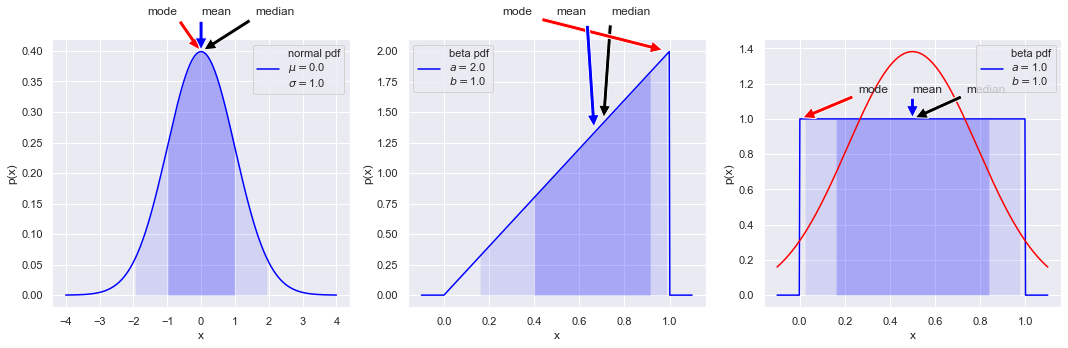

In [4]:
# Make some standard plots: normal, beta
fig = plt.figure(figsize=(15,5))

# Standard normal distribution -- try changing the mean and std. dev. 
x_norm = np.linspace(-4, 4, 500) 
mu = 0       # mean
sigma = 1.0  # standard deviation
norm_dist = stats.norm(mu, sigma) # the normal distribution from scipy.stats
norm_label='normal pdf' + '\n' + rf'$\mu=${mu:1.1f}' \
             + '\n' + rf'$\sigma=${sigma:1.1f}' 
ax1 = fig.add_subplot(1,3,1)
dist_plot(ax1, norm_label, x_norm, norm_dist)

# beta distribution, characterized by a and b parameters
x_beta = np.linspace(-0.1, 1.1, 500)  # beta ranges from 0 to 1 
a1 = 2
b1 = 1
beta_dist = stats.beta(a1, b1)  # the beta distribution from scipy.stats
beta1_label='beta pdf' + '\n' + rf'$a=${a1:1.1f}' \
              + '\n' + rf'$b=${b1:1.1f}'
ax2 = fig.add_subplot(1,3,2)
dist_plot(ax2, beta1_label, x_beta, beta_dist)

# another beta distribution
#x_beta = np.linspace(-0.1, 1.1, 500)
a2 = 1
b2 = 1
beta2_dist = stats.beta(a2, b2)
beta2_label='beta pdf' + '\n' + rf'$a=${a2:1.1f}' \
              + '\n' + rf'$b=${b2:1.1f}' 
ax3 = fig.add_subplot(1,3,3)
dist_plot(ax3, beta2_label, x_beta, beta2_dist)

mu2 = beta2_dist.mean()
sigma2 = beta2_dist.std()
norm2_dist = stats.norm(mu2, sigma2)
ax3.plot(x_beta, norm2_dist.pdf(x_beta), color='red')

fig.tight_layout()

variance for nu1: inf


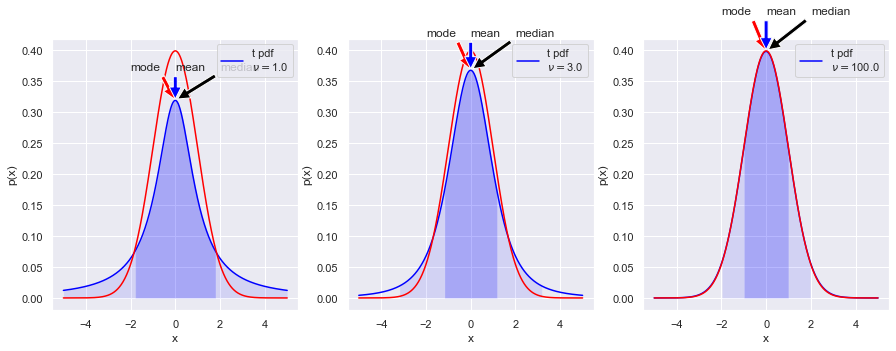

In [5]:

# Make some plots of the Student t distribution
fig = plt.figure(figsize=(15,5))

x_t = np.linspace(-5, 5, 500)

norm1_dist = stats.norm(0.,1.)  # a normal distribution for comparison

nu1 = 1.01
t1_dist = stats.t(nu1) # the Student t distribution
t1_label='t pdf' + '\n' + rf'$\nu=${nu1:1.1f}'
ax1 = fig.add_subplot(1,3,1)
dist_plot(ax1, t1_label, x_t, t1_dist)
ax1.plot(x_t, norm1_dist.pdf(x_t), color='red')

nu2 = 3
t2_dist = stats.t(nu2) # the Student t distribution
t2_label = 't pdf' + '\n' + rf'$\nu=${nu2:1.1f}'
ax2 = fig.add_subplot(1,3,2)
dist_plot(ax2, t2_label, x_t, t2_dist)
ax2.plot(x_t, norm1_dist.pdf(x_t), color='red')

nu3 = 100
t3_dist = stats.t(nu3) # the Student t distribution
t3_label = 't pdf' + '\n' + rf'$\nu=${nu3:1.1f}'
ax3 = fig.add_subplot(1,3,3)
dist_plot(ax3, t3_label, x_t, t3_dist)
ax3.plot(x_t, norm1_dist.pdf(x_t), color='red')

var1 = t1_dist.var()

print(f'variance for nu1: {var1}')


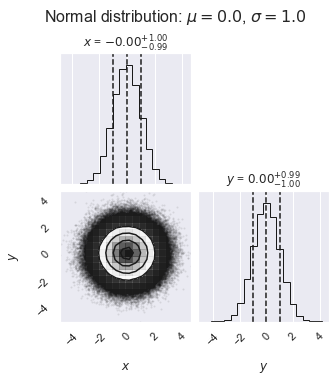

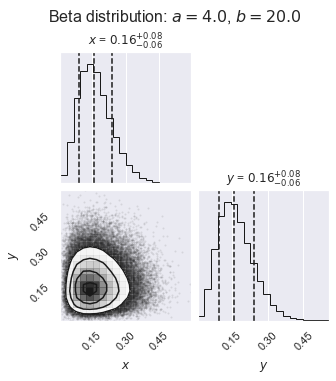

In [6]:
# examples of corner plots
ndim, nsamples = 2, 1000000
#np.random.seed(42)
# generate some synthetic data from a normal distribution
mu, sigma = 0., 1.
norm_samples = stats.norm.rvs(size=ndim * nsamples).reshape([nsamples, ndim])

figure1 = corner.corner(norm_samples, 
                        labels=[r"$x$", r"$y$", r"$\log \alpha$"],
                        quantiles=[0.16, 0.5, 0.84],
                        show_titles=True, title_kwargs={"fontsize": 12})
ax = figure1.get_axes()
my_suptitle = rf'Normal distribution: $\mu = {mu:.1f}$, ' + \
              rf'$\sigma = {sigma:.1f}$'
figure1.suptitle(my_suptitle, y=1.0, va='bottom', fontsize=16)
figure1.set_size_inches(5,5)


ndim, nsamples = 2, 100000
#np.random.seed(42)
# generate some synthetic data from a beta distribution
a = 4
b = 20
beta_samples = stats.beta(a,b).rvs(size=ndim * nsamples) \
                              .reshape([nsamples, ndim])

figure2 = corner.corner(beta_samples, 
                        labels=[r"$x$", r"$y$", r"$\log \alpha$"],
                        quantiles=[0.16, 0.5, 0.84],
                        show_titles=True, title_kwargs={"fontsize": 12})
my_suptitle = rf'Beta distribution: $a = {a:.1f}$, $b = {b:.1f}$'
figure2.suptitle(my_suptitle, y=1.0, va='bottom', fontsize=16)
figure2.set_size_inches(5,5)


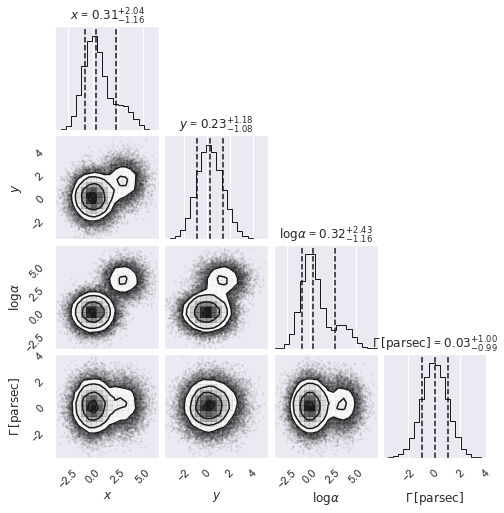

In [7]:
# now more than one mode (all random)
ndim, nsamples = 4, 50000
np.random.seed(1234)
data1 = np.random.randn(ndim * 4 * nsamples // 5) \
          .reshape([4 * nsamples // 5, ndim])
mean = 4*np.random.rand(ndim)
data2 = (mean[None, :] + np.random.randn(ndim * nsamples // 5) \
          .reshape([nsamples // 5, ndim]))
samples = np.vstack([data1, data2])

#figure = corner.corner(samples)
figure = corner.corner(samples, labels=[r"$x$", r"$y$", r"$\log \alpha$", \
                                        r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

figure.set_size_inches(7,7)


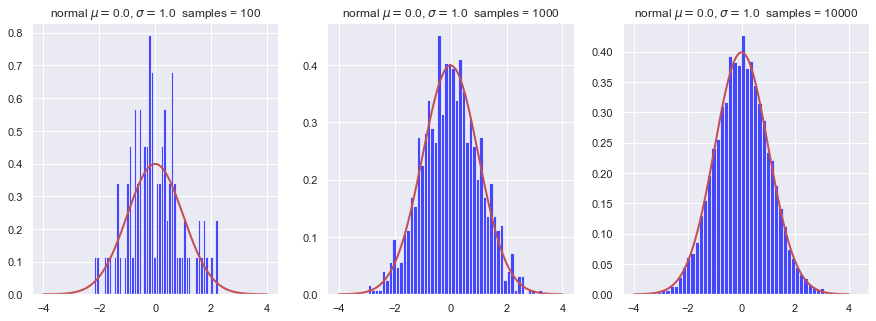

In [8]:
def plot_hist(ax, name, x_dist, dist, num_samples, num_bins):
    """Plot a pdf and a histogram of samples"""
    samples = dist.rvs(size=num_samples)  # draw random samples from the pdf
    # Make a histogram of the random samples
    count, bins, ignored = ax.hist(samples, num_bins, density=True,
                                     color='blue', alpha=0.7)
    ax.plot(x_dist, dist.pdf(x_dist), linewidth=2, color='r') # true pdf
    title_string = name + f'  samples = {num_samples:d}'
    ax.set_title(title_string)
    

mu, sigma = 0, 1.0 # mean and standard deviation
x_dist = np.linspace(-4, 4, 500)
name = rf'normal $\mu=${mu:1.1f}, $\sigma=${sigma:1.1f}'
fig = plt.figure(figsize=(15,5))
num_bins = 50

num_samples = 100
norm_dist = stats.norm(mu, sigma)
ax_1 = fig.add_subplot(1, 3, 1)
plot_hist(ax_1, name, x_dist, norm_dist, num_samples, num_bins)

num_samples = 1000
norm_dist = stats.norm(mu, sigma)
ax_2 = fig.add_subplot(1, 3, 2)
plot_hist(ax_2, name, x_dist, norm_dist, num_samples, num_bins)

num_samples = 10000
norm_dist = stats.norm(mu, sigma)
ax_3 = fig.add_subplot(1, 3, 3)
plot_hist(ax_3, name, x_dist, norm_dist, num_samples, num_bins)
